In [1]:
# Importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data
df1 = pd.read_csv('anime.csv')

In [3]:
df1.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [4]:
df1.shape

(12294, 7)

In [5]:
df1.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [6]:
df1.info()
df1.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12232 non-null object
type        12269 non-null object
episodes    12294 non-null object
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 672.4+ KB


,count,mean,std,min,25%,50%,75%,max
anime_id,12294.0,14058.221653,11455.294701,1.00,3484.25,10260.50,24794.50,34527.0
rating,12064.0,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12294.0,18071.338864,54820.676925,5.00,225.00,1550.00,9437.00,1013917.0


In [7]:
# reading second data set
df2 = pd.read_csv("rating.csv")

In [8]:
df2.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [9]:
df2.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [10]:
# combining the two data set
df = pd.merge(df1,df2,on='anime_id',suffixes= ['', '_user'])
df = df.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})

In [11]:
df.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [12]:
df.isnull().sum()

anime_id         0
anime_title      0
genre          110
type             4
episodes         0
rating           6
members          0
user_id          0
user_rating      0
dtype: int64

In [13]:
# droping null values
df = df.dropna()

In [14]:
df.shape

(7813611, 9)

In [15]:
df.isnull().sum()

anime_id       0
anime_title    0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
user_rating    0
dtype: int64

In [16]:
# counting the number of ratings made
rating_Count = (df.groupby(by = ['anime_title'])['user_rating'].count().reset_index().rename(columns = {'rating': 'totalRatingCount'})[['anime_title', 'user_rating']])

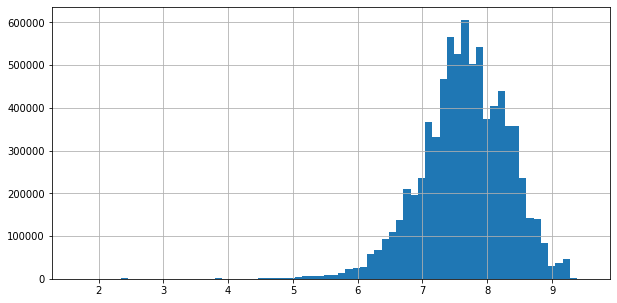

In [17]:
# graph for 'rating' column
plt.figure(figsize = (10, 5))
df['rating'].hist(bins=70)

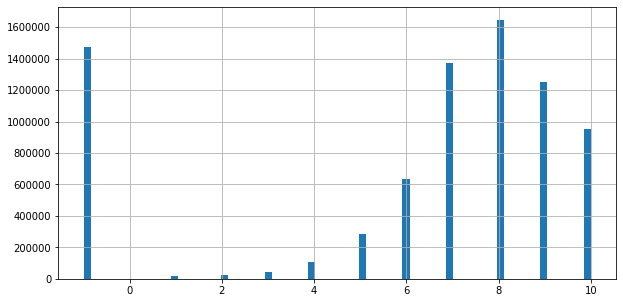

In [18]:
# graph for 'user_rating' columns
plt.figure(figsize = (10, 5))
df['user_rating'].hist(bins=70)

In [19]:
# making a copy 
anime_feature=df.copy()
# converting the -1 values to null in the 'user_rating' column
anime_feature["user_rating"].replace({-1: np.nan}, inplace=True)
anime_feature.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN


In [20]:
# droping null values
anime_feature = anime_feature.dropna(axis = 0) 
anime_feature.isnull().sum()

anime_id       0
anime_title    0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
user_rating    0
dtype: int64

In [21]:
# setting up a minimum threshold value(100) for ratings made
counts = anime_feature['user_id'].value_counts()
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 100].index)]

In [22]:
# making the pivot table
anime_pivot=anime_feature.pivot_table(index='anime_title',columns='user_id',values='user_rating').fillna(0)
anime_pivot.head()

user_id,5,7,11,14,17,21,29,38,43,44,...,73494,73495,73499,73500,73502,73503,73504,73507,73510,73515
anime_title,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#fitting the sparse matrix

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

anime_matrix = csr_matrix(anime_pivot.values)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [24]:
# ramdomly choosing a title
query_index = np.random.choice(anime_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

5290


In [25]:
# predications for it
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Major Movie: Yuujou no Winning Shot:

1: Major: Message, with distance of 0.4078693252468114:
2: Major S3, with distance of 0.42186089873861865:
3: Major S6, with distance of 0.4219285217262957:
4: Major S2, with distance of 0.42392790740017205:
5: Major S4, with distance of 0.4243539370805999:


In [26]:
# COLLABORATIVE FILTERING

# (A) Cleaning anime title
import re

def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    return text

df1['name'] = df1['name'].apply(text_cleaning)

In [27]:
# (B) Term Frequency (TF) and Inverse Document Frequency (IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,max_features=None,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',
        ngram_range=(1, 3),stop_words = 'english')

In [28]:
# Filling NaNs with empty string
df1['genre'] = df1['genre'].fillna('')
genres_str = df1['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

In [29]:
tfv_matrix.shape

(12294, 1554)

In [30]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [31]:
indices = pd.Series(df1.index, index=df1['name']).drop_duplicates()

In [32]:
# (C) THE Recommendation Function
def give_recommendation(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    anime_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': df1['name'].iloc[anime_indices].values,
                                 'Rating': df1['rating'].iloc[anime_indices].values})

In [33]:
give_recommendation('Naruto')

,Anime name,Rating
0,Naruto: Shippuuden,7.94
1,Naruto,7.81
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.68
3,Naruto x UT,7.58
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.50
6,Naruto Shippuuden: Sunny Side Battle,7.26
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,7.11
8,Battle Spirits: Ryuuko no Ken,4.89
9,Kyutai Panic Adventure!,5.21


In [34]:
give_recommendation('Kyutai Panic Adventure!')

,Anime name,Rating
0,Street Fighter II: The Movie,7.29
1,Koukou Tekken-den Tough,7.18
2,Baki,8.27
3,Huang Feihong Yong Chuang Tianxia,5.17
4,Boruto: Naruto the Movie,8.03
5,Naruto: Shippuuden,7.94
6,Naruto,7.81
7,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.68
8,Naruto x UT,7.58
9,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53


In [35]:
give_recommendation('Dragon Ball Super')

,Anime name,Rating
0,Dragon Ball Kai (2014),8.01
1,Dragon Ball Kai,7.95
2,Dragon Ball Z Movie 15: Fukkatsu no F,7.55
3,Dragon Ball Super,7.40
4,Dragon Ball Z: Summer Vacation Special,7.05
5,Dragon Ball Z: Atsumare! Gokuu World,6.76
6,Dragon Ball GT: Goku Gaiden! Yuuki no Akashi w...,6.75
7,Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...,6.28
8,Dragon Ball,8.16
9,Dragon Ball Z Movie 14: Kami to Kami,7.62
